In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv('../user_profiles.csv')

# 查看数据基本信息
print("数据基本信息:")
print(df.info())
print("\n前5行数据:")
print(df.head())

# 数据预处理
# 对分类变量进行编码
le_sex = LabelEncoder()
le_city = LabelEncoder()
le_consumption = LabelEncoder()

df['性别_编码'] = le_sex.fit_transform(df['性别'])
df['所在城市_编码'] = le_city.fit_transform(df['所在城市'])
df['消费水平_编码'] = le_consumption.fit_transform(df['消费水平'])

# 选择用于聚类的特征
features = ['性别_编码', '所在城市_编码', '消费水平_编码', '年龄', '最近活跃天数']
X = df[features]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用K-Means进行聚类
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 查看聚类结果分布
print("\n聚类结果分布:")
print(df['cluster'].value_counts())

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   性别      1000 non-null   object
 1   所在城市    1000 non-null   object
 2   消费水平    1000 non-null   object
 3   年龄      1000 non-null   int64 
 4   最近活跃天数  1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None

前5行数据:
    性别 所在城市 消费水平  年龄  最近活跃天数
0    男   广州    中  24      17
1    女   上海    中  33       4
2    女   广州    高  20      19
3  未透露   上海    中  32       7
4    男   深圳    中  30      29

聚类结果分布:
cluster
2    352
0    325
1    323
Name: count, dtype: int64


In [6]:
# 计算每个簇的质心
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

# 创建质心DataFrame
centroid_df = pd.DataFrame(centroids_original, columns=features)
centroid_df['cluster'] = range(3)

print("\n各簇质心（原始尺度）:")
print(centroid_df)

# 找到每个簇中距离质心最近的用户
representative_users = []

for cluster_id in range(3):
    # 获取当前簇的用户数据
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_scaled = X_scaled[df['cluster'] == cluster_id]
    
    # 获取当前簇的质心
    centroid = centroids[cluster_id]
    
    # 计算每个用户到质心的距离
    distances = np.linalg.norm(cluster_scaled - centroid, axis=1)
    
    # 找到距离最小的用户索引
    min_idx = np.argmin(distances)
    
    # 获取代表性用户
    rep_user = cluster_data.iloc[min_idx]
    representative_users.append(rep_user)
    
    print(f"\n簇 {cluster_id} 的代表用户:")
    print(rep_user[['性别', '所在城市', '消费水平', '年龄', '最近活跃天数']])

# 创建代表性用户DataFrame
rep_df = pd.DataFrame(representative_users)
print("\n各簇代表性用户完整数据:")
print(rep_df[['性别', '所在城市', '消费水平', '年龄', '最近活跃天数', 'cluster']])


各簇质心（原始尺度）:
      性别_编码   所在城市_编码   消费水平_编码         年龄     最近活跃天数  cluster
0  0.215385  1.873846  0.523077  39.560000  12.344615        0
1  0.956656  2.015480  2.000000  39.479876  15.092879        1
2  1.610795  2.005682  0.502841  37.153409  17.286932        2

簇 0 的代表用户:
性别         女
所在城市      北京
消费水平       低
年龄        41
最近活跃天数    14
Name: 953, dtype: object

簇 1 的代表用户:
性别        未透露
所在城市       北京
消费水平        高
年龄         39
最近活跃天数     13
Name: 467, dtype: object

簇 2 的代表用户:
性别         男
所在城市      北京
消费水平       低
年龄        33
最近活跃天数    16
Name: 25, dtype: object

各簇代表性用户完整数据:
      性别 所在城市 消费水平  年龄  最近活跃天数  cluster
953    女   北京    低  41      14        0
467  未透露   北京    高  39      13        1
25     男   北京    低  33      16        2


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/var/folders/hg/p69jc5ss1r532h1wjx7q6ckc0000gp/T/ipykernel_9123/3091960952.py:30: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hg/p69jc5ss1r532h1wjx7q6ckc0000gp/T/ipykernel_9123

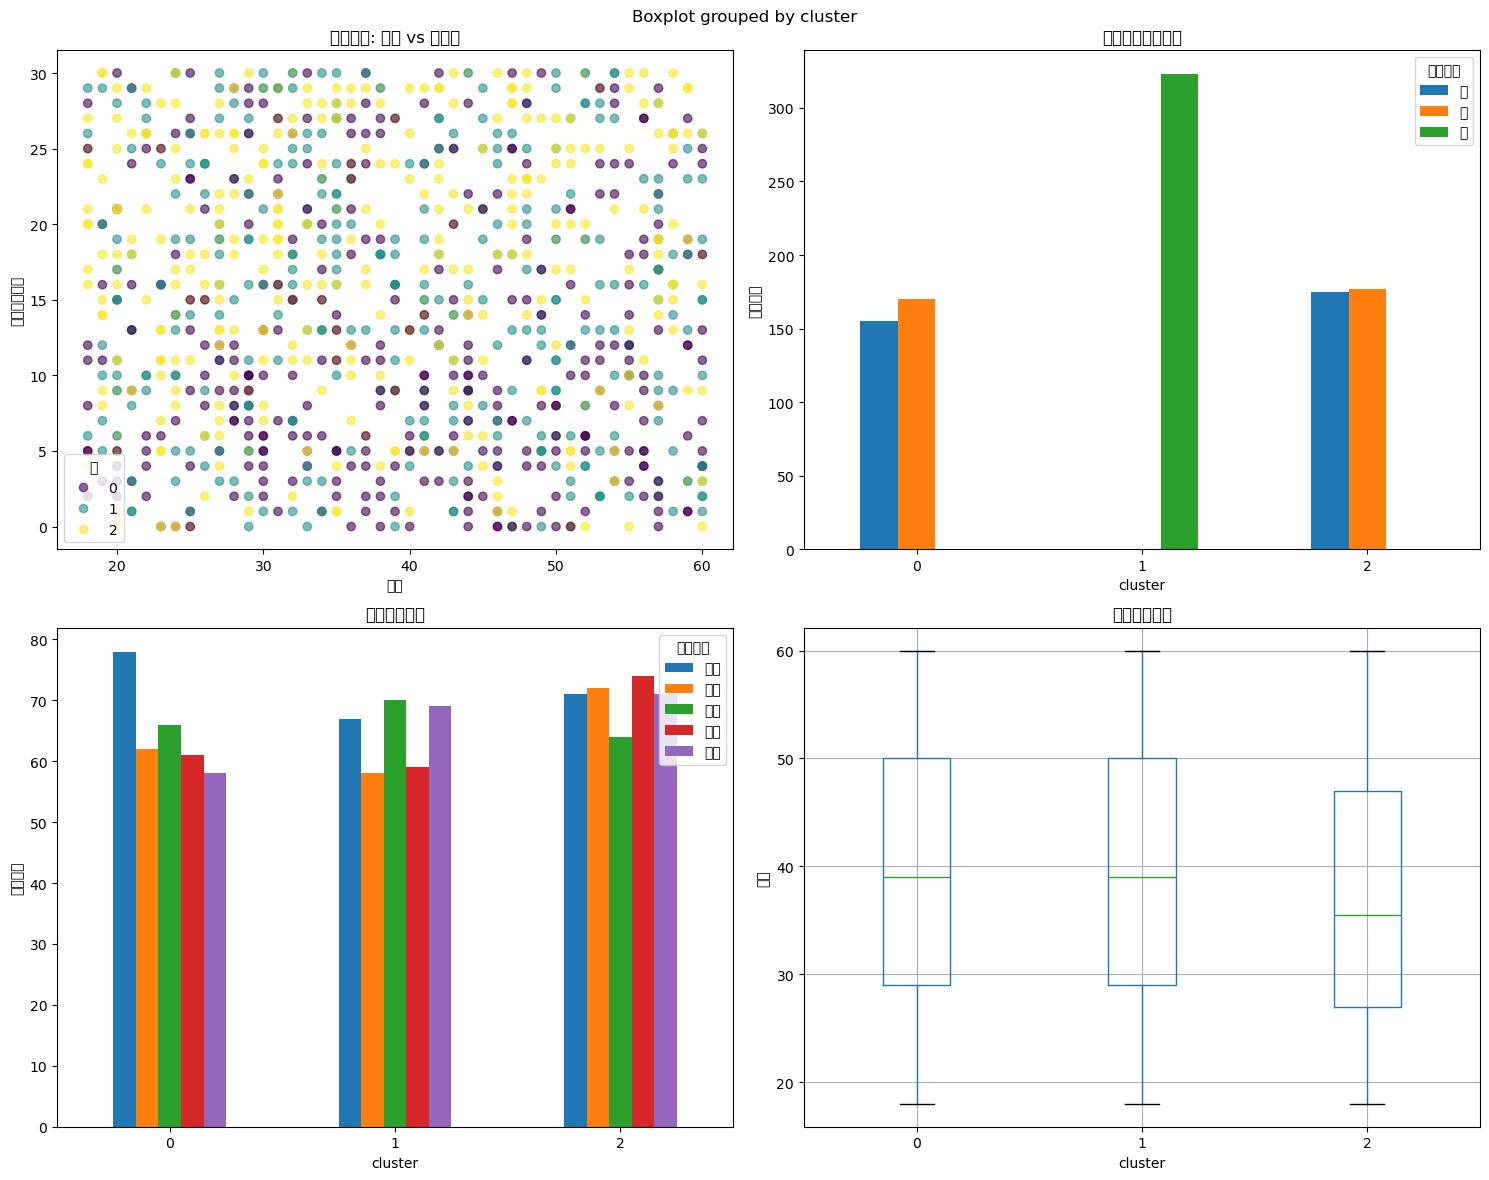

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/

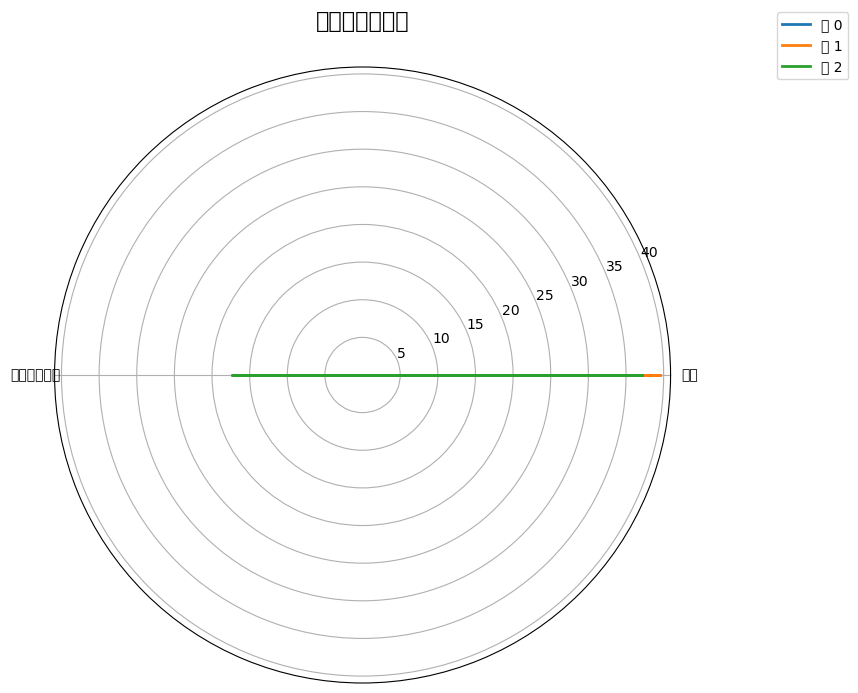

In [8]:
# 可视化聚类结果
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 年龄 vs 最近活跃天数
scatter = axes[0, 0].scatter(df['年龄'], df['最近活跃天数'], c=df['cluster'], cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel('年龄')
axes[0, 0].set_ylabel('最近活跃天数')
axes[0, 0].set_title('用户分群: 年龄 vs 活跃度')
axes[0, 0].legend(*scatter.legend_elements(), title="簇")

# 消费水平分布
consumption_counts = df.groupby(['cluster', '消费水平']).size().unstack(fill_value=0)
consumption_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('各簇消费水平分布')
axes[0, 1].set_ylabel('用户数量')
axes[0, 1].tick_params(axis='x', rotation=0)

# 城市分布
city_counts = df.groupby(['cluster', '所在城市']).size().unstack(fill_value=0)
city_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('各簇城市分布')
axes[1, 0].set_ylabel('用户数量')
axes[1, 0].tick_params(axis='x', rotation=0)

# 年龄分布箱线图
df.boxplot(column='年龄', by='cluster', ax=axes[1, 1])
axes[1, 1].set_title('各簇年龄分布')
axes[1, 1].set_ylabel('年龄')

plt.tight_layout()
plt.show()

# 绘制雷达图展示各簇特征
def plot_radar_chart(cluster_stats, features, cluster_names):
    categories = features
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, (cluster, stats) in enumerate(cluster_stats.items()):
        values = stats.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=cluster_names[i])
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_thetagrids([a * 180 / np.pi for a in angles[:-1]], categories)
    ax.set_title('各簇特征雷达图', size=16, y=1.05)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# 计算各簇的特征均值
cluster_stats = {}
for cluster_id in range(3):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_mean = cluster_data[['年龄', '最近活跃天数']].mean().to_frame().T
    cluster_stats[f'簇 {cluster_id}'] = cluster_mean

# 绘制雷达图
plot_radar_chart(cluster_stats, ['年龄', '最近活跃天数'], ['簇 0', '簇 1', '簇 2'])